## Decision Tree

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('axes', unicode_minus=False)

%matplotlib inline

In [30]:
credit = pd.read_csv('data/credit_final.csv')
print(credit.shape)

(1000, 21)


In [31]:
# feature-target split
X = credit.iloc[:,1:]
y = credit.iloc[:,0]

# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, stratify=y, 
                                                    random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 20) (300, 20) (700,) (300,)


In [32]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=3, random_state=42) # Pruning - max_depth
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model_dt.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.7133333333333334
Precision:  0.748
Recall:  0.8904761904761904
F1 Score:  0.8130434782608696
[[ 27  63]
 [ 23 187]]
              precision    recall  f1-score   support

           0       0.54      0.30      0.39        90
           1       0.75      0.89      0.81       210

    accuracy                           0.71       300
   macro avg       0.64      0.60      0.60       300
weighted avg       0.69      0.71      0.68       300



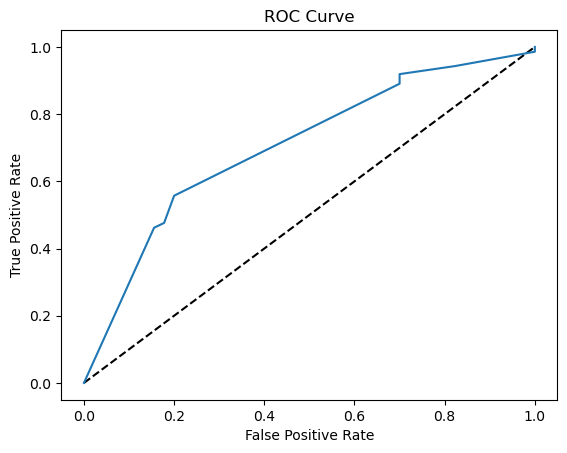

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model_dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


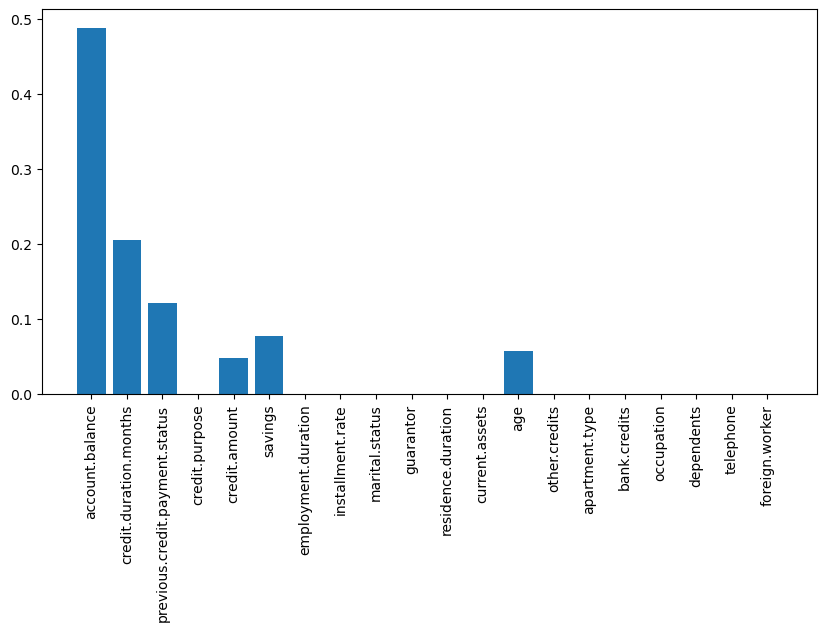

In [35]:
importances = model_dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,5))
plt.bar(X.columns, importances)
plt.xticks(X.columns, rotation=90)
plt.show()

In [36]:
!pip install graphviz

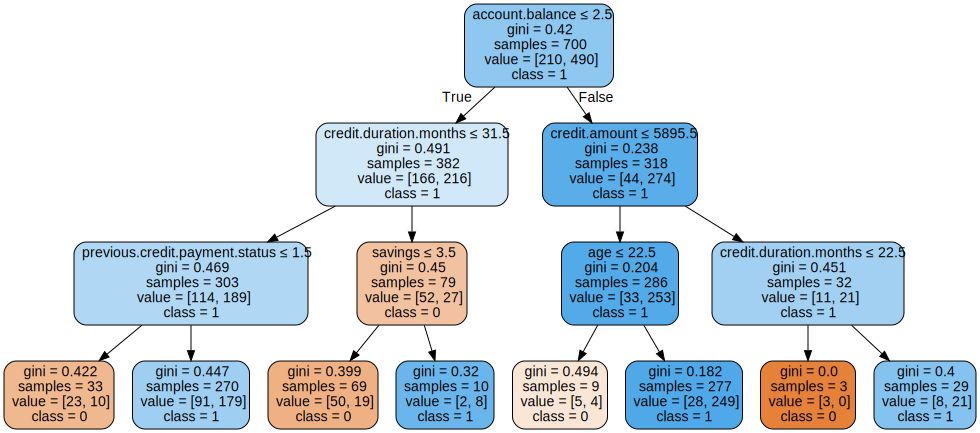

In [45]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model_dt, out_file=None,
                           feature_names=X.columns, class_names=['0','1'],
                           filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render('result/1.credit_decision_tree', format='png')
graph